In [1]:
import pandas as pd
import numpy as np
import datetime
import os
import pickle 
from matplotlib import pyplot as plt

In [2]:
os.chdir(r"C:\Users\aman.khatri91425\Desktop\HomeCredit\Bigdata\Common Maps KNN")

In [3]:
df = pd.read_pickle(os.getcwd()+r"\Data Files\Combined Score.pkl")

In [4]:
TIME_DECISION_DATE = "TIME_DECISION_DATE"
FINAL_SCORE = "COMBINED_SCORE_KNN"
RISK_SCORE = "RISK_SCORE"
COMBINED_SCORE = "COMBINED_SCORE"
TARGET = "RISK_FSTQPD30"
PREDICTOR_LIST = ['G_RISK_FSTQPD30_SCORE', 'G_RISK_FPD10_SCORE','G_DEFAULT_FLAG_CHANGE_1']
df["MONTH"] = df[TIME_DECISION_DATE].dt.strftime("%y-%m")

In [5]:
df.head()

,SKP_CREDIT_CASE,TIME_DECISION_DATE,CUS_LAT,CUS_LONG,GRID_ID,RISK_FSTQPD30,RISK_SCORE,G_DEFAULT_FLAG_CHANGE_1,DEFAULT_FLAG_CHANGE_1,LOGIT_G_DEFAULT_FLAG_CHANGE_1,...,RISK_FPD10_SCORE,LOGIT_G_RISK_FPD10_SCORE,G_RISK_FSTQPD30_SCORE,RISK_FSTQPD30_SCORE,LOGIT_G_RISK_FSTQPD30_SCORE,COMBINED_SCORE_KNN,LOGIT_RISK_SCORE,LOGIT_COMBINED_SCORE_KNN,COMBINED_SCORE,MONTH
0,223799321,2019-02-01,30.867149,75.930356,500_01611_05161,0.0,0.128722,0.500000,0.500000,0.000000,...,0.446494,-0.178025,0.422872,0.422872,-0.310993,0.042380,-1.912303,-3.117764,0.079339,19-02
3,223889994,2019-02-01,28.569622,77.286007,500_01857_04652,0.0,0.202042,0.545168,0.536765,0.181166,...,0.512915,0.052886,0.527339,0.526596,0.109465,0.058167,-1.373579,-2.784518,0.125285,19-02
7,223890202,2019-02-01,28.607001,77.320596,500_01864_04660,0.0,0.094800,0.515441,0.514706,0.061784,...,0.498155,-0.010831,0.550389,0.547872,0.202244,0.060928,-2.256382,-2.735194,0.088800,19-02
8,223890203,2019-02-01,19.117477,72.863350,500_00902_02629,0.0,0.110657,0.523897,0.514706,0.095661,...,0.468635,-0.102591,0.411814,0.388298,-0.356471,0.041732,-2.084052,-3.133853,0.072724,19-02
9,223890206,2019-02-01,28.676949,77.205724,500_01842_04676,0.0,0.030189,0.472285,0.470588,-0.110973,...,0.453875,-0.162871,0.482458,0.481383,-0.070196,0.049534,-3.469607,-2.954298,0.044227,19-02


# GINI

### Gini Chart

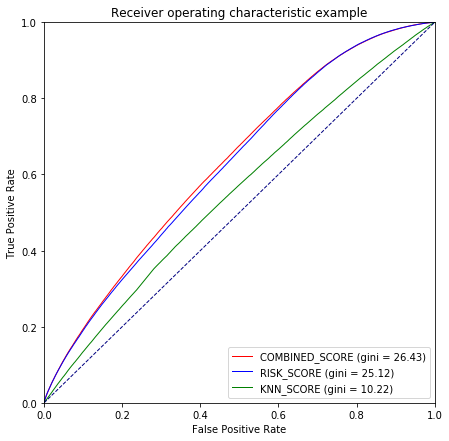

In [6]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

fig = plt.figure(figsize = (7,7))
ax1 = fig.add_subplot(1, 1, 1)

lw = 1
fpr, tpr, thresholds = roc_curve(df[TARGET],df[COMBINED_SCORE])
roc_auc = auc(fpr, tpr)
ax1.plot(fpr, tpr, color='red', lw=lw, label='COMBINED_SCORE (gini = %0.2f)' % ((2*roc_auc-1)*100))

fpr, tpr, thresholds = roc_curve(df[TARGET],df[RISK_SCORE])
roc_auc = auc(fpr, tpr)
ax1.plot(fpr, tpr, color='blue', lw=lw, label='RISK_SCORE (gini = %0.2f)' % ((2*roc_auc-1)*100))

fpr, tpr, thresholds = roc_curve(df[TARGET],df[FINAL_SCORE])
roc_auc = auc(fpr, tpr)
ax1.plot(fpr, tpr, color='green', lw=lw, label='KNN_SCORE (gini = %0.2f)' % ((2*roc_auc-1)*100))

ax1.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

### MOM GINI

In [9]:
gini_dic = {}
for x in df["MONTH"].unique():
    if "MONTH" not in gini_dic:
        gini_dic["MONTH"] = []
    if FINAL_SCORE not in gini_dic: 
        gini_dic[FINAL_SCORE] = []
    if RISK_SCORE not in gini_dic: 
        gini_dic[RISK_SCORE] = []
    if COMBINED_SCORE not in gini_dic: 
        gini_dic[COMBINED_SCORE] = []
    gini_dic["MONTH"].append(x)
    gini_dic[FINAL_SCORE].append((2*roc_auc_score(df[df["MONTH"]==x]["RISK_FSTQPD30"],df[df["MONTH"]==x][FINAL_SCORE])-1)*100)
    gini_dic[RISK_SCORE].append((2*roc_auc_score(df[df["MONTH"]==x]["RISK_FSTQPD30"],df[df["MONTH"]==x][RISK_SCORE])-1)*100)
    gini_dic[COMBINED_SCORE].append((2*roc_auc_score(df[df["MONTH"]==x]["RISK_FSTQPD30"],df[df["MONTH"]==x][COMBINED_SCORE])-1)*100)
    for y in PREDICTOR_LIST:
        if y not in gini_dic:
              gini_dic[y] = []
        gini_dic[y].append(((2*roc_auc_score(df[df["MONTH"]==x]["RISK_FSTQPD30"],df[df["MONTH"]==x][y])-1)*100))
    
gini_df = pd.DataFrame(gini_dic)
gini_df

,MONTH,COMBINED_SCORE_KNN,RISK_SCORE,COMBINED_SCORE,G_RISK_FSTQPD30_SCORE,G_RISK_FPD10_SCORE,G_DEFAULT_FLAG_CHANGE_1
0,19-02,11.274086,26.221354,27.702126,10.771412,9.686134,2.367067
1,19-03,11.458668,25.088779,26.868551,11.077285,9.228358,2.273477
2,19-04,11.562161,26.240273,27.752196,11.282969,8.414928,3.250623
3,19-05,10.137345,26.924605,28.185655,9.779801,7.664352,3.884831
4,19-06,9.558832,24.438208,25.638713,9.322961,7.289230,2.029307
5,19-07,8.672529,21.314861,22.441152,8.528748,6.209098,1.331410
6,19-08,9.426712,23.532289,24.732067,9.099412,7.636605,1.541703


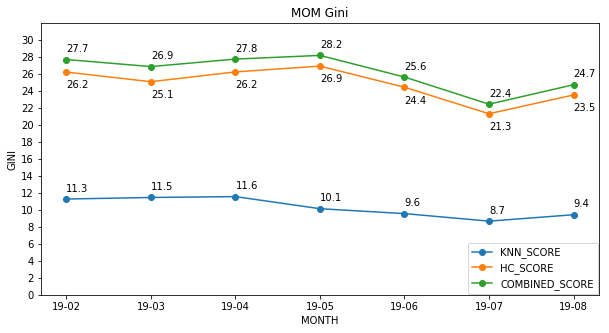

In [10]:
fig = plt.figure(figsize = (10,5))
ax1 = fig.add_subplot(1, 1, 1)
ax1.plot(gini_df["MONTH"],gini_df["COMBINED_SCORE_KNN"], marker='o', scaley = False, label = "KNN_SCORE")
ax1.plot(gini_df["MONTH"],gini_df["RISK_SCORE"], marker='o', scaley = False, label = "HC_SCORE")
ax1.plot(gini_df["MONTH"],gini_df["COMBINED_SCORE"], marker='o', scaley = False, label= "COMBINED_SCORE")

for i, txt in enumerate(gini_df["COMBINED_SCORE_KNN"]):
    plt.annotate("{:.1f}".format(txt), (gini_df["MONTH"][i], gini_df["COMBINED_SCORE_KNN"][i]+0.9))
for i, txt in enumerate(gini_df["RISK_SCORE"]):
    plt.annotate("{:.1f}".format(txt), (gini_df["MONTH"][i], gini_df["RISK_SCORE"][i]-1.9))
for i, txt in enumerate(gini_df["COMBINED_SCORE"]):
    plt.annotate("{:.1f}".format(txt), (gini_df["MONTH"][i], gini_df["COMBINED_SCORE"][i]+0.9))

plt.legend(loc='lower right', borderaxespad=0.1)
plt.ylim(0,32)
plt.ylabel("GINI")
plt.xlabel("MONTH")
plt.yticks(np.arange(0,32,2))
ax1.set_title("MOM Gini")
plt.show()

### MOM GINI of Predictors

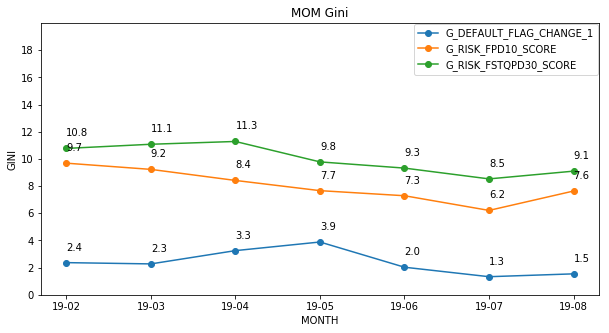

In [147]:
fig = plt.figure(figsize = (10,5))
ax1 = fig.add_subplot(1, 1, 1)

for x in PREDICTOR_LIST:
    ax1.plot(gini_df["MONTH"],gini_df[x], marker='o', scaley = False, label = x)
    for i, txt in enumerate(gini_df[x]):
        plt.annotate("{:.1f}".format(txt), (gini_df["MONTH"][i], gini_df[x][i]+0.9))

plt.legend(loc='upper right', borderaxespad=0.1)
plt.ylim(0,20)
plt.ylabel("GINI")
plt.xlabel("MONTH")
plt.yticks(np.arange(0,20,2))
ax1.set_title("MOM Gini")
plt.show()

# Lifts and Gains Chart

In [7]:
def lift_and_gain_df(data=None,target=None, prob=None):
    data['target0'] = 1 - data[target]
    data['bucket'] = pd.qcut(data[prob], 10)
    grouped = data.groupby('bucket', as_index = False)
    liftstable = pd.DataFrame()
    liftstable['min_prob'] = grouped.min()[prob]
    liftstable['max_prob'] = grouped.max()[prob]
    liftstable['total']   = grouped.count()[target]
    liftstable['bads']   = round(grouped.sum()[target])
    liftstable['goods'] = round(grouped.sum()['target0'])
    liftstable['%base'] = (liftstable.total / data[target].count())
    liftstable = liftstable.sort_values(by="min_prob", ascending=False).reset_index(drop = True)
    liftstable['cum%_base'] = (liftstable.total / data[target].count()).cumsum()
    liftstable['%bads'] = (liftstable['bads'] / data[target].sum())
    liftstable['%goods'] = (liftstable['goods'] / data['target0'].sum())
    liftstable['cum%_bads']=(liftstable['bads'] / data[target].sum()).cumsum()
    liftstable['cum%_goods']=(liftstable['bads'] / data['target0'].sum()).cumsum()

    
    liftstable['lift'] = np.round(liftstable['%bads']/liftstable['%base'] , 3)
    liftstable['cum_lift'] = np.round(liftstable['cum%_bads']/liftstable['cum%_base'] , 3)

    #Formating
    liftstable['%base']= liftstable['%base'].apply('{0:.2%}'.format)
    liftstable['%bads']= liftstable['%bads'].apply('{0:.2%}'.format)
    liftstable['%goods']= liftstable['%goods'].apply('{0:.2%}'.format)
    liftstable['cum%_bads']= liftstable['cum%_bads'].apply('{0:.2%}'.format)
    liftstable['cum%_goods']= liftstable['cum%_goods'].apply('{0:.2%}'.format)
    liftstable['cum%_base'] = liftstable['cum%_base'].apply('{0:.2%}'.format)

    liftstable.index = range(1,11)
    liftstable.index.rename('Decile', inplace=True)
    pd.set_option('display.max_columns', 13)
    return(liftstable)

In [8]:
#cum%_bads is gain_score
combined_score_lift = lift_and_gain_df(data=df,target=TARGET, prob=COMBINED_SCORE)
risk_score_lift = lift_and_gain_df(data=df,target=TARGET, prob=RISK_SCORE)
final_score_lift = lift_and_gain_df(data=df,target=TARGET, prob=FINAL_SCORE)

### Cumulative Lift Chart 

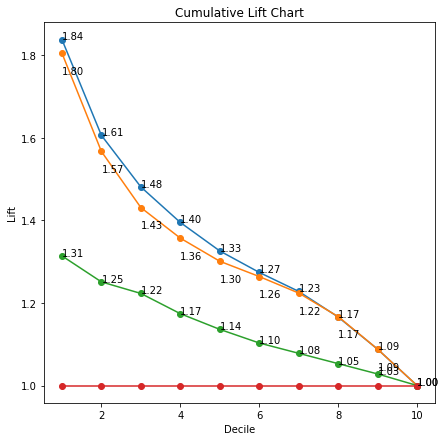

In [26]:
fig = plt.figure(figsize = [7,7])
ax1 = fig.add_subplot(1,1,1)
ax1.plot(combined_score_lift.index,combined_score_lift["cum_lift"], label = 'combined_score', marker='o')
for i, txt in enumerate(combined_score_lift["cum_lift"]):
    plt.annotate("{:.2f}".format(txt), (combined_score_lift.index[i], combined_score_lift["cum_lift"][i+1]))

ax1.plot(combined_score_lift.index,risk_score_lift["cum_lift"], label = 'risk_score', marker='o')
for i, txt in enumerate(risk_score_lift["cum_lift"]):
    plt.annotate("{:.2f}".format(txt), (risk_score_lift.index[i], risk_score_lift["cum_lift"][i+1]-0.05))

ax1.plot(combined_score_lift.index,final_score_lift["cum_lift"], label = 'knn_score', marker='o')
for i, txt in enumerate(final_score_lift["cum_lift"]):
    plt.annotate("{:.2f}".format(txt), (risk_score_lift.index[i], final_score_lift["cum_lift"][i+1]))

ax1.plot(np.arange(1,11,1),[1,1,1,1,1,1,1,1,1,1], label = 'random', marker='o')

plt.xlabel("Decile")
plt.ylabel("Lift")

ax1.set_title("Cumulative Lift Chart")
plt.show()    


## Gains Chart

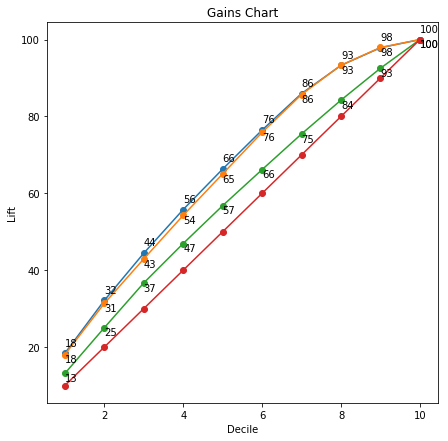

In [40]:
fig = plt.figure(figsize = [7,7])
ax1 = fig.add_subplot(1,1,1)
ax1.plot(combined_score_lift.index,[float(x.replace("%","")) for x in combined_score_lift["cum%_bads"]], label = 'combined_score', marker='o')
for i, txt in enumerate([float(x.replace("%","")) for x in combined_score_lift["cum%_bads"]]):
    plt.annotate("{:.0f}".format(txt), (combined_score_lift.index[i], [float(x.replace("%","")) for x in combined_score_lift["cum%_bads"]][i]+2))

ax1.plot(combined_score_lift.index,[float(x.replace("%","")) for x in risk_score_lift["cum%_bads"]], label = 'risk_score', marker='o')
for i, txt in enumerate([float(x.replace("%","")) for x in risk_score_lift["cum%_bads"]]):
    plt.annotate("{:.0f}".format(txt), (risk_score_lift.index[i], [float(x.replace("%","")) for x in risk_score_lift["cum%_bads"]][i]-2))

ax1.plot(combined_score_lift.index,[float(x.replace("%","")) for x in final_score_lift["cum%_bads"]], label = 'knn_score', marker='o')
for i, txt in enumerate([float(x.replace("%","")) for x in final_score_lift["cum%_bads"]]):
    plt.annotate("{:.0f}".format(txt), (risk_score_lift.index[i], [float(x.replace("%","")) for x in final_score_lift["cum%_bads"]][i]-2))

ax1.plot(np.arange(1,11,1),np.arange(10,101,10), label = 'random', marker='o')

plt.xlabel("Decile")
plt.ylabel("Lift")

ax1.set_title("Gains Chart")
plt.show()    


# Kolomogorov Smirnov chart

In [243]:
def ks(data=None,target=None, prob=None):
    data['target0'] = 1 - data[target]
    data['bucket'] = pd.qcut(data[prob], 10)
    grouped = data.groupby('bucket', as_index = False)
    kstable = pd.DataFrame()
    kstable['min_prob'] = grouped.min()[prob]
    kstable['max_prob'] = grouped.max()[prob]
    kstable['bads']   = grouped.sum()[target]
    kstable['goods'] = grouped.sum()['target0']
    kstable = kstable.sort_values(by="min_prob", ascending=False).reset_index(drop = True)
    kstable['%bads'] = (kstable.bads / data[target].sum()).apply('{0:.2%}'.format)
    kstable['%goods'] = (kstable.goods / data['target0'].sum()).apply('{0:.2%}'.format)
    kstable['cum%_bads']=(kstable.bads / data[target].sum()).cumsum()
    kstable['cum%_goods']=(kstable.goods / data['target0'].sum()).cumsum()
    kstable['KS'] = np.round(kstable['cum%_bads']-kstable['cum%_goods'], 3) * 100

    #Formating
    kstable['cum%_bads']= kstable['cum%_bads'].apply('{0:.2%}'.format)
    kstable['cum%_goods']= kstable['cum%_goods'].apply('{0:.2%}'.format)
    kstable.index = range(1,11)
    kstable.index.rename('Decile', inplace=True)
    pd.set_option('display.max_columns', 9)
    #print(kstable)
    
    #Display KS
    print("KS is " + str(max(kstable['KS']))+"%"+ " at decile " + str((kstable.index[kstable['KS']==max(kstable['KS'])][0])))
    return(kstable)

KS is 17.7% at decile 6


,min_prob,max_prob,bads,goods,%bads,%goods,cum%_bads,cum%_goods,KS
Decile,,,,,,,,,
1,0.114815,0.488509,28105.0,187068.0,18.38%,9.36%,18.38%,9.36%,9.0
2,0.099729,0.114815,21016.0,194156.0,13.74%,9.71%,32.12%,19.07%,13.0
3,0.088883,0.099729,18826.0,196347.0,12.31%,9.82%,44.42%,28.90%,15.5
4,0.079303,0.088883,17374.0,197798.0,11.36%,9.90%,55.78%,38.79%,17.0
5,0.069747,0.079303,16095.0,199077.0,10.52%,9.96%,66.31%,48.75%,17.6
6,0.059314,0.069747,15531.0,199642.0,10.15%,9.99%,76.46%,58.74%,17.7
7,0.047896,0.059314,14524.0,200648.0,9.50%,10.04%,85.96%,68.78%,17.2
8,0.037183,0.047896,11216.0,203957.0,7.33%,10.20%,93.29%,78.98%,14.3
9,0.027969,0.037183,7026.0,208146.0,4.59%,10.41%,97.88%,89.40%,8.5


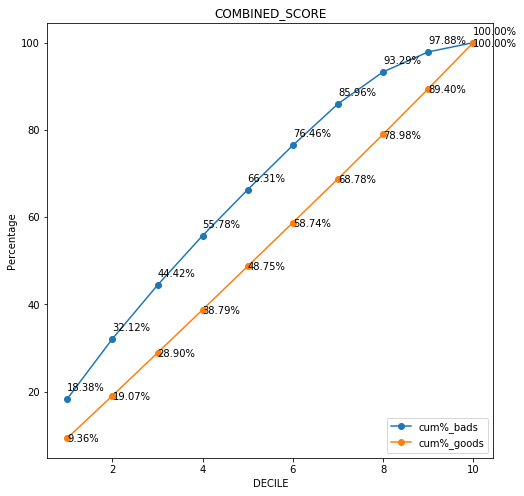

In [268]:
ks_df=ks(data=df,target=TARGET, prob=COMBINED_SCORE)

fig = plt.figure(figsize = [8,8])
ax1 = fig.add_subplot(1,1,1)
ax1.plot(ks_df.index,[float(x.replace("%","")) for x in ks_df["cum%_bads"]], label = "cum%_bads", marker='o')
for i, txt in enumerate(ks_df["cum%_bads"]):
    plt.annotate(txt, (ks_df.index[i], [float(x.replace("%","")) for x in ks_df["cum%_bads"]][i]+1.9))
ax1.plot(ks_df.index,[float(x.replace("%","")) for x in ks_df["cum%_goods"]], label = "cum%_goods", marker='o')
for i, txt in enumerate(ks_df["cum%_goods"]):
    plt.annotate(txt, (ks_df.index[i], [float(x.replace("%","")) for x in ks_df["cum%_goods"]][i]-0.9))
plt.xlabel("DECILE")
plt.ylabel("Percentage")
plt.legend(loc = 'lower right')
ax1.set_title("COMBINED_SCORE")
    
ks_df

KS is 17.1% at decile 6


,min_prob,max_prob,bads,goods,%bads,%goods,cum%_bads,cum%_goods,KS
Decile,,,,,,,,,
1,0.182845,0.862856,27613.0,187560.0,18.05%,9.38%,18.05%,9.38%,8.7
2,0.148465,0.182845,20321.0,194840.0,13.29%,9.75%,31.34%,19.13%,12.2
3,0.123385,0.148465,17734.0,197365.0,11.59%,9.87%,42.93%,29.01%,13.9
4,0.099674,0.123385,17336.0,197921.0,11.33%,9.90%,54.27%,38.91%,15.4
5,0.077211,0.099674,16491.0,198681.0,10.78%,9.94%,65.05%,48.85%,16.2
6,0.054675,0.077210,16525.0,198622.0,10.80%,9.94%,75.85%,58.79%,17.1
7,0.034609,0.054675,15074.0,200124.0,9.86%,10.01%,85.71%,68.80%,16.9
8,0.020430,0.034609,11676.0,203497.0,7.63%,10.18%,93.34%,78.98%,14.4
9,0.011573,0.020430,7037.0,208135.0,4.60%,10.41%,97.94%,89.39%,8.6


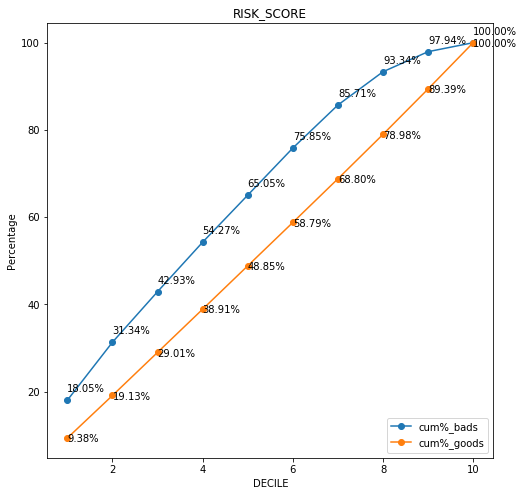

In [269]:
ks_df=ks(data=df,target=TARGET, prob=RISK_SCORE)

fig = plt.figure(figsize = [8,8])
ax1 = fig.add_subplot(1,1,1)
ax1.plot(ks_df.index,[float(x.replace("%","")) for x in ks_df["cum%_bads"]], label = "cum%_bads",marker='o')
for i, txt in enumerate(ks_df["cum%_bads"]):
    plt.annotate(txt, (ks_df.index[i], [float(x.replace("%","")) for x in ks_df["cum%_bads"]][i]+1.9))
ax1.plot(ks_df.index,[float(x.replace("%","")) for x in ks_df["cum%_goods"]], label = "cum%_goods", marker='o')
for i, txt in enumerate(ks_df["cum%_goods"]):
    plt.annotate(txt, (ks_df.index[i], [float(x.replace("%","")) for x in ks_df["cum%_goods"]][i]-0.9))
plt.xlabel("DECILE")
plt.ylabel("Percentage")
plt.legend(loc = 'lower right')
ax1.set_title("RISK_SCORE")
    
ks_df

KS is 7.5% at decile 4


,min_prob,max_prob,bads,goods,%bads,%goods,cum%_bads,cum%_goods,KS
Decile,,,,,,,,,
1,0.065091,0.163705,20087.0,195045.0,13.13%,9.76%,13.13%,9.76%,3.4
2,0.059032,0.065090,18174.0,197039.0,11.88%,9.86%,25.02%,19.62%,5.4
3,0.056656,0.059032,17837.0,197335.0,11.66%,9.87%,36.68%,29.49%,7.2
4,0.053466,0.056656,15702.0,199469.0,10.27%,9.98%,46.94%,39.47%,7.5
5,0.050782,0.053466,15065.0,200097.0,9.85%,10.01%,56.79%,49.48%,7.3
6,0.048434,0.050782,14350.0,200807.0,9.38%,10.05%,66.17%,59.53%,6.6
7,0.046111,0.048434,14183.0,201014.0,9.27%,10.06%,75.45%,69.58%,5.9
8,0.043578,0.046111,13459.0,201716.0,8.80%,10.09%,84.25%,79.67%,4.6
9,0.040448,0.043578,12705.0,202467.0,8.31%,10.13%,92.55%,89.80%,2.7


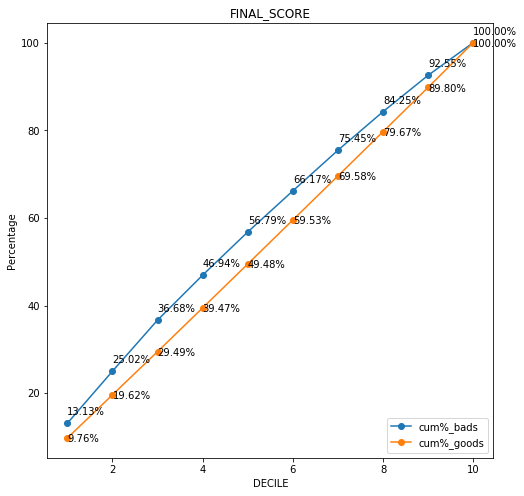

In [270]:
ks_df=ks(data=df,target=TARGET, prob=FINAL_SCORE)

fig = plt.figure(figsize = [8,8])
ax1 = fig.add_subplot(1,1,1)
ax1.plot(ks_df.index,[float(x.replace("%","")) for x in ks_df["cum%_bads"]], label = "cum%_bads", marker='o')
for i, txt in enumerate(ks_df["cum%_bads"]):
    plt.annotate(txt, (ks_df.index[i], [float(x.replace("%","")) for x in ks_df["cum%_bads"]][i]+1.9))
ax1.plot(ks_df.index,[float(x.replace("%","")) for x in ks_df["cum%_goods"]], label = "cum%_goods", marker='o')
for i, txt in enumerate(ks_df["cum%_goods"]):
    plt.annotate(txt, (ks_df.index[i], [float(x.replace("%","")) for x in ks_df["cum%_goods"]][i]-0.9))
plt.xlabel("DECILE")
plt.ylabel("Percentage")
plt.legend(loc = 'lower right')
ax1.set_title("FINAL_SCORE")

ks_df

# Log Loss

# Concordant – Discordant ratio

# Precision Recall Curve

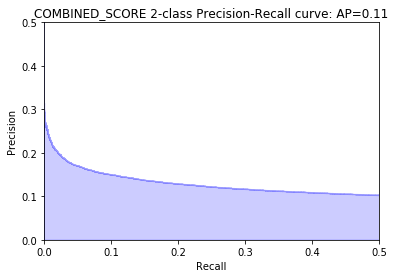

COMBINED_SCORE AUC for precision-recall : 0.11104417833366768




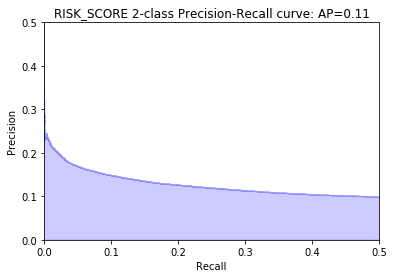

RISK_SCORE AUC for precision-recall : 0.10879135656808937




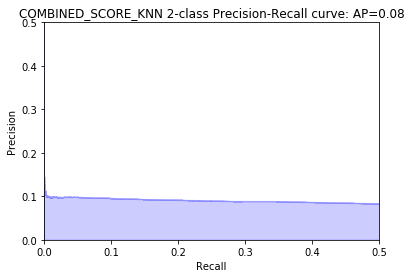

COMBINED_SCORE_KNN AUC for precision-recall : 0.08340538998875906




In [206]:
from sklearn.metrics import precision_recall_curve, average_precision_score

for x in [COMBINED_SCORE,RISK_SCORE,FINAL_SCORE]:
    precision, recall, _ = precision_recall_curve(df[TARGET],df[x])

    step_kwargs = ({'step': 'post'}
                   #if 'step' in signature(plt.fill_between).parameters
                   #else {}
                  )
    plt.step(recall, precision, color='b', alpha=0.2, where='post')
    plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 0.5])
    plt.xlim([0.0, 0.5])
    plt.title(x+' 2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision_score(df[TARGET],df[x])))
    plt.show()
    # calculate precision-recall AUC
    auc_pr = auc(recall, precision)
    #print(x +" AUC for precision-recall :",auc_pr)
    print("\n")
